## Подготовка данных

Загрузим и подготовим данные. 
Сперва просмотрим данные первые 5 строк данных, количество пропусков, а также размер датасета.

In [1]:
# импортируем библиотеку pandas, а также все необходимые библиотеки машинного обучения 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

print('\033[1m' + 'Первые 5 строк.' + '\033[0m')

display(data.head())
print('')
print('\033[1m' + 'Количество пропусков.' + '\033[0m')
print('')
print(data.isna().sum())
print('')
print('\033[1m' + 'Размер датасета.' + '\033[0m')
print('')
print(data.shape)
print('')

Первые 5 строк.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Количество пропусков.

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Размер датасета.

(10000, 14)



Мы видим пропуск в признаке "Tenure" — сколько лет человек является клиентом банка. Так как человек может являться клиентом банке 0 лет (первый год), то заполним пропуски в данном признаке нулями и проверим их отсутствие.

In [3]:
data.replace([np.nan], data['Tenure'].median(), inplace=True)
print(data.isna().sum())
print(data.shape)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
(10000, 14)


Для преобразования признаков в решающем дереве и случайном лесе воспользуемся техникой Ordinal Encoding. Она позволяет закодировать цифрами выраженные в тексте категории. 

In [4]:
data = data.drop('Surname', axis=1)
data = data.drop('CustomerId', axis=1)
data = data.drop('RowNumber', axis=1)
display(data.head())
data = pd.get_dummies(data, drop_first = True) 
display(data.head())
display(data.shape)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


(10000, 12)

Масштабируем числовые признаки. Для этого воспользуемся отдельной структурой для стандартизации данных — StandardScaler.

In [5]:
pd.options.mode.chained_assignment = None

target = data['Exited']
features = data.drop('Exited', axis=1)
features_train, features_test_valid, target_train, target_test_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test_valid, target_test_valid, test_size=0.5, random_state=12345)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
scaler.fit(features_test[numeric]) 
scaler.fit(features_valid[numeric]) 


features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print('Размер "features_train":', features_train.shape)
print('Размер "features_test":', features_test.shape)
print('Размер "features_valid":', features_valid.shape)

Размер "features_train": (6000, 11)
Размер "features_test": (2000, 11)
Размер "features_valid": (2000, 11)


## Исследование задачи

Для более точного понимания адекватиности модели применим агрегирующую метрику F1-меру. Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1. Проверим значение F1-меры для модели алгоритма RandomForestClassifier с различным количеством параметра "max_depth" - глубина дерева.

In [6]:
best_result_rfc = 0
for est in range(1, 16): # переберем количество деревьев в лесу
    for crit in ['gini', 'entropy']: # переберем функцию измерения качества разделения
        for depth in range(1, 16): # переберем максимальную глубину дерева
            model_rfc = RFC(random_state=12345, 
                        n_estimators=est, 
                        criterion = crit,
                        max_depth = depth) 
            model_rfc.fit(features_train, target_train) # обучим модель на тренировочной выборке
            predicted_valid = model_rfc.predict(features_valid)
            f1_best_score = f1_score(target_valid, predicted_valid)
            if f1_best_score > best_result_rfc:
                best_result_rfc = f1_best_score  # сохраним наилучшее значение F1-меры на валидационных данных
                best_est_rfc = est # сохраним наилучшее количество деревьев в лесу
                best_crit = crit # сохраним наилучшую функцию измерения качества разделения
                best_depth_rfc = depth # сохраним наилучшую максимальную глубину дерева
print('Наилучшая максимальная глубина дерева:', best_depth_rfc)
print('Наилучшее количество деревьев:', best_est_rfc)
print('Наилучшее значение F1:', best_result_rfc)
print('Наилучшая функция измерения качества:', best_crit)

Наилучшая максимальная глубина дерева: 13
Наилучшее количество деревьев: 9
Наилучшее значение F1: 0.552437223042836
Наилучшая функция измерения качества: entropy


In [7]:
best_result_dtc = 0
for depth in range(1, 20): # переберем максимальную глубину дерева
    for crit in ['gini', 'entropy']: # переберем функцию измерения качества разделения
        for split in ['best', 'random']: # переберем стратегию, используемую для выбора разделения в каждом узле
                model_dtc = DTC(random_state=12345, 
                                max_depth = depth,
                                criterion = crit,
                                splitter = split) 
                model_dtc.fit(features_train, target_train) # обучим модель на тренировочной выборке
                predicted_valid = model_dtc.predict(features_valid)
                f1_best_score = f1_score(target_valid, predicted_valid)
                if f1_best_score > best_result_dtc:
                    best_result_dtc = f1_best_score # сохраним наилучшую модель
                    best_depth_dtc = depth # сохраним наилучшее значение максимальной глубины дерева
                    best_crit = crit # сохраним наилучшее значение функции измерения качества разделения
                    best_splitter = split # сохраним наилучшую стратегию, используемую для выбора разделения в каждом узле
print('Наилучшее значение F1:', best_result_dtc) 
print('Наилучшее значение максимальной глубины дерева:', best_depth_dtc)
print('Наилучшее значение функции измерения качества разделения:', best_crit)
print('Наилучшая стратегия, используемая для выбора разделения в каждом узле:',best_splitter )

Наилучшее значение F1: 0.5527065527065527
Наилучшее значение максимальной глубины дерева: 6
Наилучшее значение функции измерения качества разделения: gini
Наилучшая стратегия, используемая для выбора разделения в каждом узле: random


Рассмотрим баланс классов для понимания того, какие редкие классы существуют.

<AxesSubplot:>

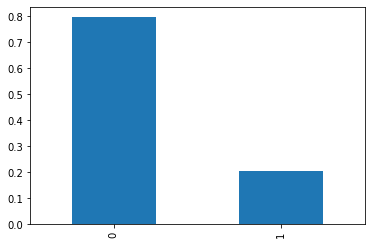

In [8]:
target.value_counts(normalize=True).plot(kind='bar')

In [9]:
model = DTC(random_state=12345, 
            max_depth = 7,
            criterion = 'entropy',
            splitter = 'random')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid))

[[1539   38]
 [ 337   86]]


Как можно заметить имеется дисбаланс классов. Для борьбы с диспалансом применим методы "увеличение выборки", "уменьшение выборки", "изменение порога". 

## Борьба с дисбалансом

Применим метод "увеличение выборки".

In [10]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DTC(random_state=12345, 
        max_depth = 7,
        criterion = 'entropy',
        splitter = 'random')
model.fit(features_upsampled, target_upsampled) 
predicted_valid =  model.predict(features_valid)


print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.572


Как можно заметить значение F1-меры превысило 0,59.

Применим метод "уменьшение выборки".

In [11]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DTC(random_state=12345, 
            max_depth = 7,
            criterion = 'entropy',
            splitter = 'random')
model.fit(features_downsampled, target_downsampled) 
predicted_valid =  model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5454545454545454


Как можно заметить значение F1-меры стало ниже 0,59.

Применим метод "изменение порога". 

In [12]:
model = DTC(random_state=12345, 
            max_depth = 7,
            criterion = 'entropy',
            splitter = 'random')
model.fit(features_train, target_train)

for threshold in np.arange(0, 0.3, 0.02):
    probabilities_valid = model.predict_proba(features_valid) 
    probabilities_one_valid = probabilities_valid[:, 1]
    predicted_valid = probabilities_one_valid > threshold 
    f1_score1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f}, F1 = {:.3f}".format(
        threshold, f1_score1))

Порог = 0.00, F1 = 0.354
Порог = 0.02, F1 = 0.381
Порог = 0.04, F1 = 0.416
Порог = 0.06, F1 = 0.453
Порог = 0.08, F1 = 0.476
Порог = 0.10, F1 = 0.493
Порог = 0.12, F1 = 0.535
Порог = 0.14, F1 = 0.541
Порог = 0.16, F1 = 0.534
Порог = 0.18, F1 = 0.540
Порог = 0.20, F1 = 0.546
Порог = 0.22, F1 = 0.534
Порог = 0.24, F1 = 0.549
Порог = 0.26, F1 = 0.537
Порог = 0.28, F1 = 0.528


Как можно заметить в данном методе значение F1-меры достигает выше 0,59 с порога значения 0,2.
В итоге можно сделать вывод, что для увеличения F1-меры помогли методы "увеличение выборки" и "изменение порога".

## Тестирование модели

Проведем тестирование на тестовой выборке.

In [13]:
model = DTC(random_state=12345, 
            max_depth = 7,
            criterion = 'entropy',
            splitter = 'random')
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test) 
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.22
f1_score1 = f1_score(target_test, predicted_test)
print("F1 = {:.3f}".format(f1_score1))

F1 = 0.540


In [14]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = DTC(random_state=12345, 
        max_depth = 7,
        criterion = 'entropy',
        splitter = 'random')
model.fit(features_upsampled, target_upsampled) 
predicted_test =  model.predict(features_test)


print("F1:", f1_score(target_test, predicted_test))

F1: 0.5573440643863179


In [15]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

model = DTC(random_state=12345, 
        max_depth = 7,
        criterion = 'entropy',
        splitter = 'random')
model.fit(features_upsampled, target_upsampled) 
predicted_test =  model.predict(features_test)


print("F1:", f1_score(target_test, predicted_test))

F1: 0.5997521685254027


Проверим качество модели. Для этого вычислим AUC-ROCK и построим ROC-кривую, или кривую ошибок. Чем график выше, тем больше значение TPR и лучше качество модели. 

In [16]:
model = DTC(random_state=12345, 
            max_depth = 7,
            criterion = 'entropy',
            splitter = 'random')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8023846037378329


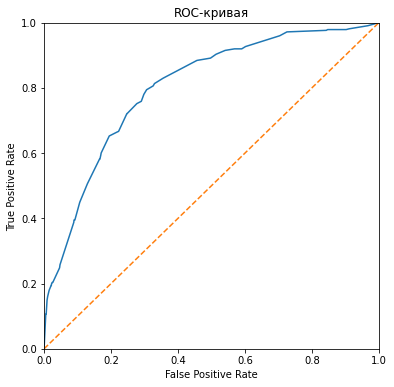

In [17]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(6,6))

# < постройте график >
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

# < примените функции plt.xlim() и plt.ylim(), чтобы
#   установить границы осей от 0 до 1 >
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
# < примените функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title("ROC-кривая")
plt.show()

По полученным данным, можно сделать вывод, что наша модель имеет высокое значение AUC-ROCK.

**Вывод:** 

В данном проекте необходимо было спрогнозировать, уйдет ли клиент из "Бета"-банка в ближайшее время. Сперва был обработан датасет в котором пропуски в признаке Tenure были заменены медианным значением в этого признака. Для преобразования категориальных признаков в количественные воспользовались техникой One Hot Encoding. В дальнейшем произвели масштабирование числовых признаков. Для понимание того, какая модель даст лучшее значение F1-меры исследовали две модели RandomForestClassifier и DecisionTreeClassifier. В результате модель DecisionTreeClassifier показала наилучшее значение F1-меры, равное 0.56. Определили, что в целевом признаке наблюдается дисбаланс классов с коэффициентом 4, в котором значения целевого признака 0 превышают значения целевого признака 1. Для борьбы с дисбалансом были применены методы "увеличение выборки", "уменьшение выборки", "изменение порога". В результате значение F1-меры более или равным 0,59 удалось достичь с помощью методов "увеличение выборки" (0,59),  "изменение порога" (0,61). В дальнейшем модель и метод борьбы с дисбалансои протестировали на тестовой выборке. В результате теста было получены несовсем удовлетворяющие значения F1-меры, а именно для метода "увеличение выборки" (0,57),  "изменение порога" (0,57). Стоит отметить, что при уменьшении коэффициента с 4 до 2 в методе "увеличение выборки", значение F1-меры становится равным 0,59. В конце для проверки качества модели вычислили значение AUC-ROC, а также построили ROC-кривую. Значение AUC-ROC получилось 0,84,что показывает хорошее качество классификации конкретной модели. Также на графике мы  видим геометрическую зависимость между долей верно классифицированных объектов положительного класса и долей ложноположительных объектов.  <div>